# ABSENTEEISM AT WORK

## 1. Introduction

The aim of the project is to find a relation between some factors(such as age, children etc.) and an absent time at work. The data set is obtained from [Absenteeism at Work](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work). 

#### **Information about the Data Set**

There are 740 instances and 21 attributes in the data. The attribute information is as follow:

1. Individual identification (ID) 
2. Reason for absence (ICD). 

*Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:*

*I.Certain infectious and parasitic diseases,*

*II.Neoplasms,* 

*III. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,* 

*IV. Endocrine, nutritional and metabolic diseases,*

*V. Mental and behavioural disorders,* 

*VI. Diseases of the nervous system,* 

*VII. Diseases of the eye and adnexa,* 

*VIII. Diseases of the ear and mastoid process,*   

*IX. Diseases of the circulatory system,* 

*X. Diseases of the respiratory system,* 

*XI. Diseases of the digestive system,* 

*XII. Diseases of the skin and subcutaneous tissue,* 

*XIII. Diseases of the musculoskeletal system and connective tissue,* 

*XIV. Diseases of the genitourinary system,* 

*XV. Pregnancy, childbirth and the puerperium,* 

*XVI. Certain conditions originating in the perinatal period,* 

*XVII. Congenital malformations, deformations and chromosomal abnormalities,* 

*XVIII. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified,* 

*XIX. Injury, poisoning and certain other consequences of external causes,* 

*XX. External causes of morbidity and mortality,*

*XXI. Factors influencing health status and contact with health services.* 

*And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).* 

3. Month of absence 
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) 
6. Transportation expense 
7. Distance from Residence to Work (kilometers) 
8. Service time 
9. Age 
10. Work load Average/day 
11. Hit target 
12. Disciplinary failure (yes=1; no=0) 
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 
14. Son (number of children) 
15. Social drinker (yes=1; no=0) 
16. Social smoker (yes=1; no=0) 
17. Pet (number of pet) 
18. Weight 
19. Height 
20. Body mass index 
21. Absenteeism time in hours (target) 

**Sources:**

1. https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
2. https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values
3. https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9
4. https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf
5
6. https://bookdown.org/rdpeng/artofdatascience/exploratory-data-analysis.html
7. https://rpubs.com/williamsurles/299664

## 2. Getting First Insights of Data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [2]:
#read dataset from csv file
df = pd.read_csv('./Absenteeism_at_work.csv', sep=';')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


From looking at the data table, it can be seen that there are 0 values in columns 'Absenteeism time in hours' and 'Reason for absence'. 

In [4]:
# check for 0 values
test = df[df['Reason for absence']==0]
test

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,...,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,...,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,...,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,...,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,...,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,...,1,1,1,1,0,0,98,178,31,0
203,2,0,4,2,3,235,29,12,48,326.452,...,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,...,1,1,2,1,1,0,68,168,24,0
214,18,0,5,4,3,330,16,4,28,378.884,...,1,2,0,0,0,0,84,182,25,0


There are 43 rows with 0 value for the reason code. Since they are not giving an accurate information for the analysis, I will omit them from the data.

In [5]:
df = df.drop(df.loc[df['Reason for absence']==0].index).reset_index()
df

,index,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11,26,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,4
1,2,3,23,7,4,1,179,51,18,38,...,0,1,0,1,0,0,89,170,31,2
2,3,7,7,7,5,1,279,5,14,39,...,0,1,2,1,1,0,68,168,24,4
3,4,11,23,7,5,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,2
4,5,3,23,7,6,1,179,51,18,38,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,732,10,22,7,4,1,361,52,3,28,...,0,1,1,1,0,4,80,172,27,8
693,733,28,22,7,4,1,225,26,9,28,...,0,1,1,0,0,2,69,169,24,8
694,734,13,13,7,2,1,369,17,12,31,...,0,1,3,1,0,0,70,169,25,80
695,735,11,14,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,8


It seems 'Disciplinary failure' column is a binary. I will check if there is a value '1' for this column.

In [6]:
df[df['Disciplinary failure']==1].values.any()

False

Since all the values are zero for this column, it can be deleted from the data.

In [7]:
df = df.drop('Disciplinary failure', 1)

We successfully loaded and cleaned the data set. Now, I will check the size and attributes of this data set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            697 non-null    int64  
 1   ID                               697 non-null    int64  
 2   Reason for absence               697 non-null    int64  
 3   Month of absence                 697 non-null    int64  
 4   Day of the week                  697 non-null    int64  
 5   Seasons                          697 non-null    int64  
 6   Transportation expense           697 non-null    int64  
 7   Distance from Residence to Work  697 non-null    int64  
 8   Service time                     697 non-null    int64  
 9   Age                              697 non-null    int64  
 10  Work load Average/day            697 non-null    float64
 11  Hit target                       697 non-null    int64  
 12  Education             

There are 697 observations and 20 characteristics. All of the columns have integer or float values and there are not any NaN values. Some of the characteristics need to be changed into categorical data type. And lastly, I will change column names for simplicity.

In [9]:
df = df.rename(columns={'Reason for absence':'Reason','Month of absence':'Month','Day of the week':'Day',
                        'Transportation expense':'Trans_expense','Distance from Residence to Work':'Distance(km)',
                        'Service time':'Service_time','Work load Average/day ':'Work_load',
                        'Hit target':'Hit_target','Son':'Children','Social drinker':'Social_drinker',
                        'Social smoker':'Social_smoker','Body mass index':'Body_mass_ind',
                       'Absenteeism time in hours':'Absen_time(hrs)'})

df.Month=df.Month.replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12], 
                          value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df.Day=df.Day.replace(to_replace=[2,3,4,5,6], value=['Mon','Tue','Wed','Thu','Fri'])
df.Seasons=df.Seasons.replace(to_replace=[1,2,3,4], value=['summer', 'autumn', 'winter', 'spring'])
df.Education=df.Education.replace(to_replace=[1,2,3,4], 
                                  value=['high school', 'graduate', 'postgraduate', 'master and doctor'])
df.Social_drinker=df.Social_drinker.replace(to_replace=[0,1], value=['No','Yes'])
df.Social_smoker=df.Social_smoker.replace(to_replace=[0,1], value=['No','Yes'])

In [10]:
df['ID'] = df['ID'].astype('str') # identification column
df['Reason'] = df['Reason'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Day'] = df['Day'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Social_drinker'] = df['Social_drinker'].astype('category')
df['Social_smoker'] = df['Social_smoker'].astype('category')
df['Children'] = df['Children'].astype('category')
df['Pet'] = df['Pet'].astype('category')

In [11]:
df

,index,ID,Reason,Month,Day,Seasons,Trans_expense,Distance(km),Service_time,Age,...,Hit_target,Education,Children,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_ind,Absen_time(hrs)
0,0,11,26,Jul,Tue,summer,289,36,13,33,...,97,high school,2,Yes,No,1,90,172,30,4
1,2,3,23,Jul,Wed,summer,179,51,18,38,...,97,high school,0,Yes,No,0,89,170,31,2
2,3,7,7,Jul,Thu,summer,279,5,14,39,...,97,high school,2,Yes,Yes,0,68,168,24,4
3,4,11,23,Jul,Thu,summer,289,36,13,33,...,97,high school,2,Yes,No,1,90,172,30,2
4,5,3,23,Jul,Fri,summer,179,51,18,38,...,97,high school,0,Yes,No,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,732,10,22,Jul,Wed,summer,361,52,3,28,...,93,high school,1,Yes,No,4,80,172,27,8
693,733,28,22,Jul,Wed,summer,225,26,9,28,...,93,high school,1,No,No,2,69,169,24,8
694,734,13,13,Jul,Mon,summer,369,17,12,31,...,93,high school,3,Yes,No,0,70,169,25,80
695,735,11,14,Jul,Tue,summer,289,36,13,33,...,93,high school,2,Yes,No,1,90,172,30,8


In [12]:
#see summary statistics
df.describe()

,index,Trans_expense,Distance(km),Service_time,Age,Work_load,Hit_target,Weight,Height,Body_mass_ind,Absen_time(hrs)
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,370.569584,219.770445,29.824964,12.549498,36.255380,271.219416,94.720230,78.757532,172.131994,26.575323,7.351506
std,213.919421,65.869224,14.863974,4.438038,6.376202,39.093620,3.653538,12.722617,6.082746,4.190214,13.621678
min,0.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,56.000000,163.000000,19.000000,0.000000
25%,181.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,69.000000,169.000000,24.000000,2.000000
50%,375.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,80.000000,170.000000,25.000000,3.000000
75%,558.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,89.000000,172.000000,31.000000,8.000000
max,736.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,108.000000,196.000000,38.000000,120.000000


Some statistical values such as mean, max, min and standard deviation for numerical characteristics can be seen in the table above. Mean of the absenteeism time is calculated as 7.35 hours, but the max value is 120 hours. We can say that there are some outliers.

In [13]:
df['Reason'].value_counts()

23    149
28    112
27     69
13     55
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
12      8
6       8
21      6
8       6
9       4
16      3
24      3
5       3
15      2
4       2
17      1
3       1
2       1
Name: Reason, dtype: int64

Based on the value counts of reason codes above, the most common reason codes are 23 and 28 which are medical consultation and dental consultation. 

In [14]:
len(df.ID.unique())

33

The data contains 33 different employees' information.

## 3. Exploratory Data Analysis

I will start to examine the data more deeply by using graphs and charts for each individual characteristic in the data. Than, I will check if the characteristics have correlation.

### Reason Codes of Absenteeism

It can be said that the last 7 codes, which are not fall in International Code of Diseases (ICD) category, are the most frequent reasons for absence. In ICD category, the highst three codes are 13, 19 and 11.
On the other hand, reason codes 13 and 19 are the most effective reasons which cause the most absent time in hours.

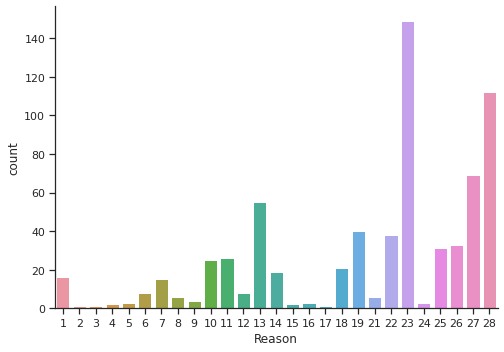

In [15]:
# bar plot for Reason Codes for Absence
ax = sns.catplot(x='Reason', kind='count', data=df, height=5, aspect=11/8)

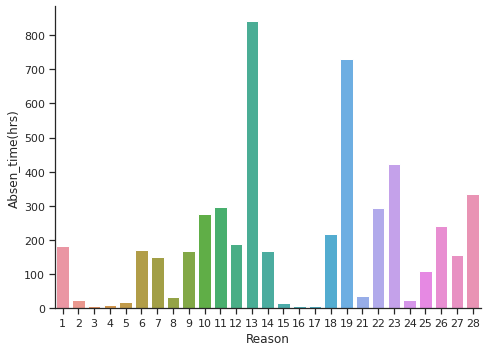

In [16]:
# bar plot for Reason Codes vs Absent Time
sns.catplot(x='Reason', y='Absen_time(hrs)', kind='bar', data=df, estimator=sum, ci=None, height=5, aspect=11/8)

### Month of Absence

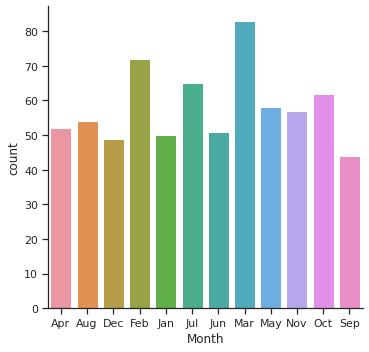

In [17]:
# bar plot for Month of Absence
sns.catplot(x='Month', kind='count', data=df)

The month with the maximum number of absentees is March.

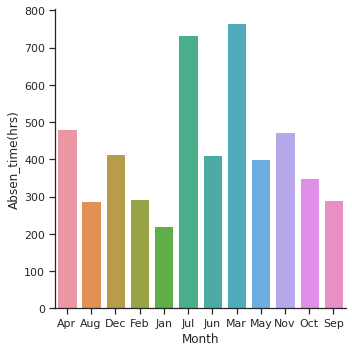

In [18]:
# bar plot for Absent Hours in Months
sns.catplot(x='Month', y='Absen_time(hrs)', kind='bar', data=df, estimator=sum, ci=None)

In terms of total hours of absenteeism, March has the maximum value with approximately 750 hours and July is very close to March.

### Season of Absence

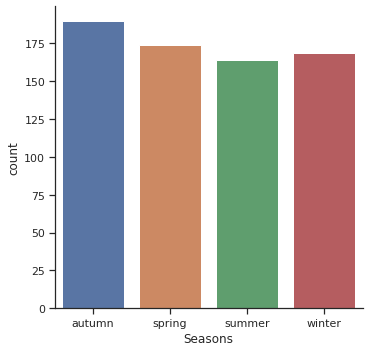

In [19]:
# bar plot for Seasons of Absence
sns.catplot(x='Seasons', kind='count', data=df)

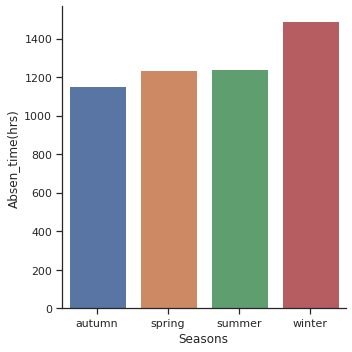

In [20]:
# bar plot for Absent Hours in Seasons
sns.catplot(x='Seasons', y='Absen_time(hrs)', kind='bar', data=df, estimator=sum, ci=None)

In Autumn, although the number of people who were absent is maximum, total absence hours is minimum. Winter is the season which people were absent mostly.

### Day of Absence

People are tend to be absent at work mostly at the begining of the week, especially on Mondays. 

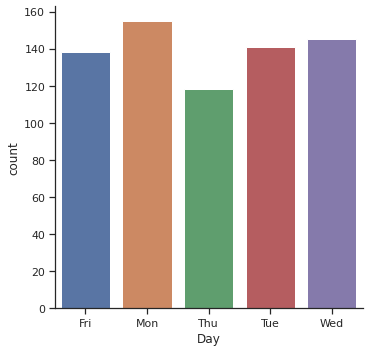

In [21]:
# bar plot for Day of Absence
sns.catplot(x='Day', kind='count', data=df)

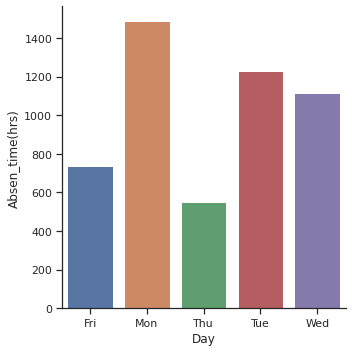

In [22]:
# bar plot for Absent Hours in Days
sns.catplot(x='Day', y='Absen_time(hrs)', kind='bar', data=df, estimator=sum, ci=None)

### Education, Children, Social Drinker, Social Smoker

* High percentage of people who were absent at work have high school education level and are not social smoker. 
* People with no children have been absent more times than people with children. 
* However, in terms of total hours of absenteeism, people have 2 children have more absent time than other categories.

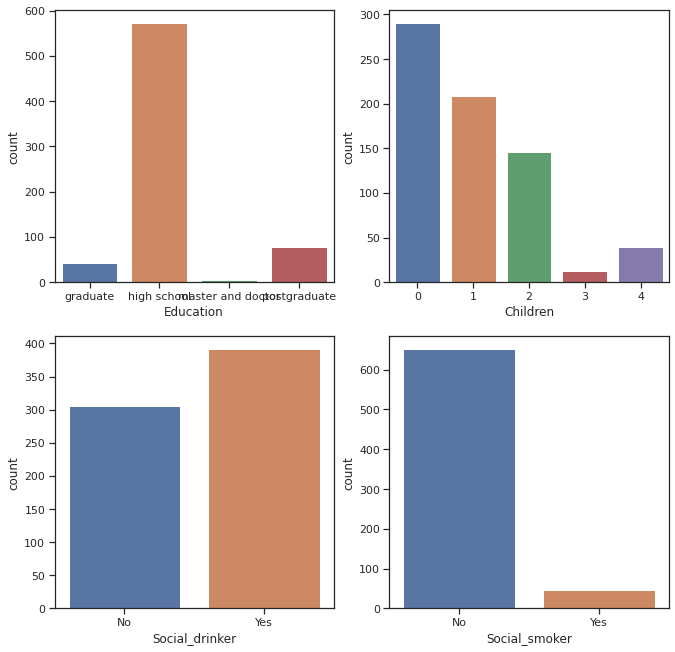

In [23]:
#bar plots for categorical data
fig, axs = plt.subplots(figsize=(11,11), ncols=2, nrows=2)
sns.countplot(x='Education', data=df, ax=axs[0][0])
sns.countplot(x='Children', data=df, ax=axs[0][1])
sns.countplot(x='Social_drinker', data=df, ax=axs[1][0])
sns.countplot(x='Social_smoker', data=df, ax=axs[1][1])

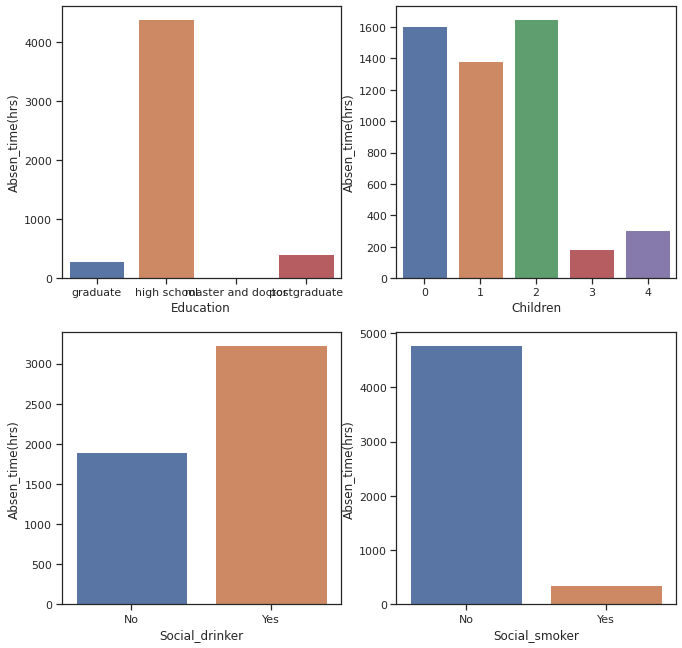

In [24]:
#bar plots for categorical data
fig, axs = plt.subplots(figsize=(11,11), ncols=2, nrows=2)
sns.barplot(x='Education', y='Absen_time(hrs)', data=df, ax=axs[0][0], estimator=sum, ci=None)
sns.barplot(x='Children', y='Absen_time(hrs)', data=df, ax=axs[0][1], estimator=sum, ci=None)
sns.barplot(x='Social_drinker', y='Absen_time(hrs)', data=df, ax=axs[1][0], estimator=sum, ci=None)
sns.barplot(x='Social_smoker', y='Absen_time(hrs)', data=df, ax=axs[1][1], estimator=sum, ci=None)

### Barplots of Numerical Data

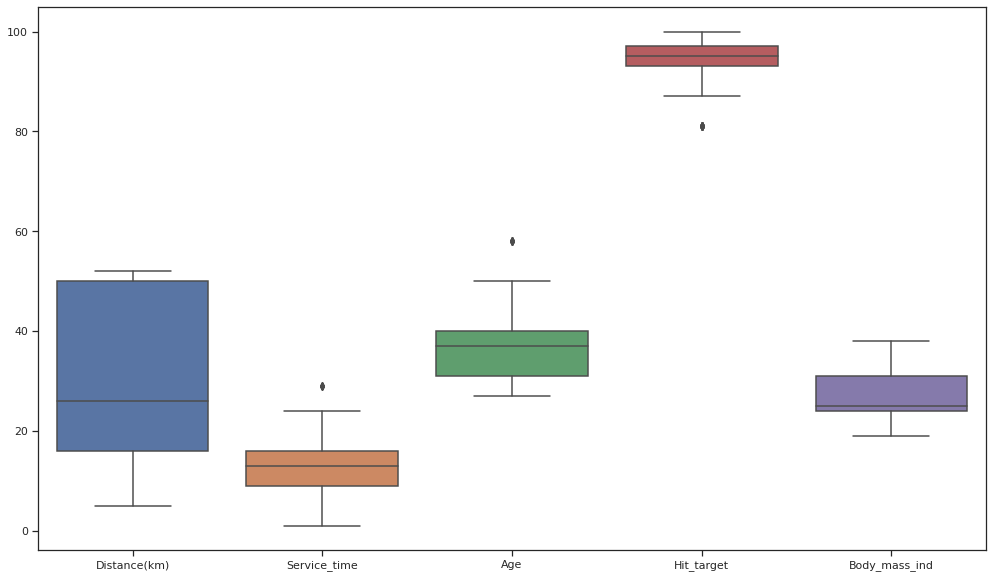

In [25]:
# make barplots of numerical data
stats = df[['Distance(km)','Service_time','Age','Hit_target','Body_mass_ind']]
fig, ax = plt.subplots(figsize= (17,10))
ax = sns.boxplot(data=stats)

There are outliers in 'Service time', 'Age' and 'Hit target' data. 

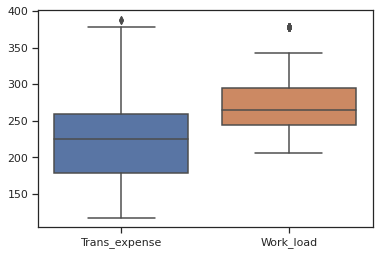

In [26]:
# make barplots of numerical data
stats2 = df[['Trans_expense','Work_load']]
sns.boxplot(data=stats2)

* Transportation expense have a big range between 50 and 400. The median of expense is around 225 and half of the data is between 180 and 260.
* The work load have smaller range than transportation expense. The median is around 260.

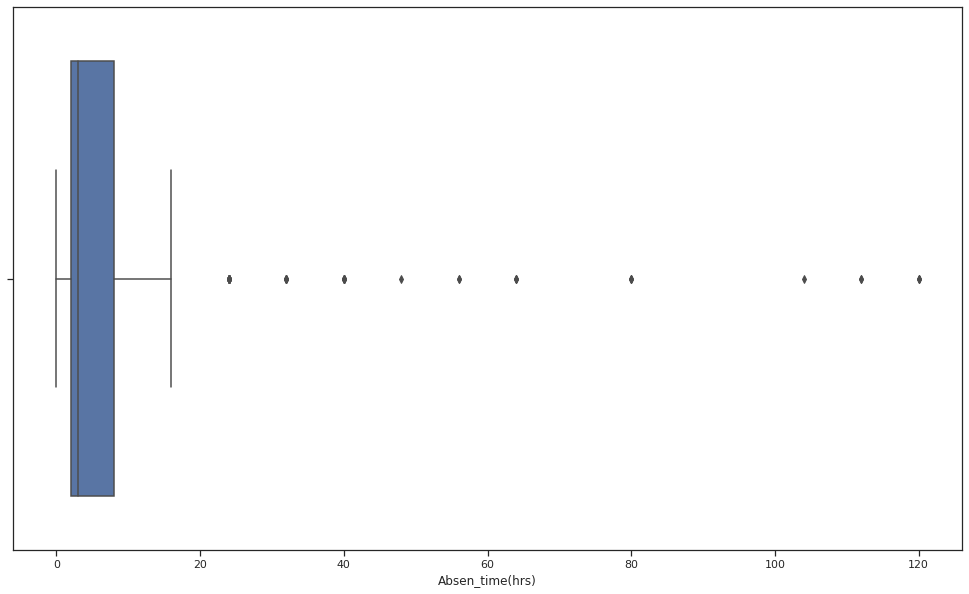

In [27]:
plt.subplots(figsize= (17,10))
sns.boxplot(df['Absen_time(hrs)'])

Median is around 3, and the spread of the data is between 0 and 120 hours. There are many outliers which are greater than 20 hours. However when the outliers are excluded, range is 20 hours. 

### Histogram of Absent Time

(0.0, 138.12791739950745)

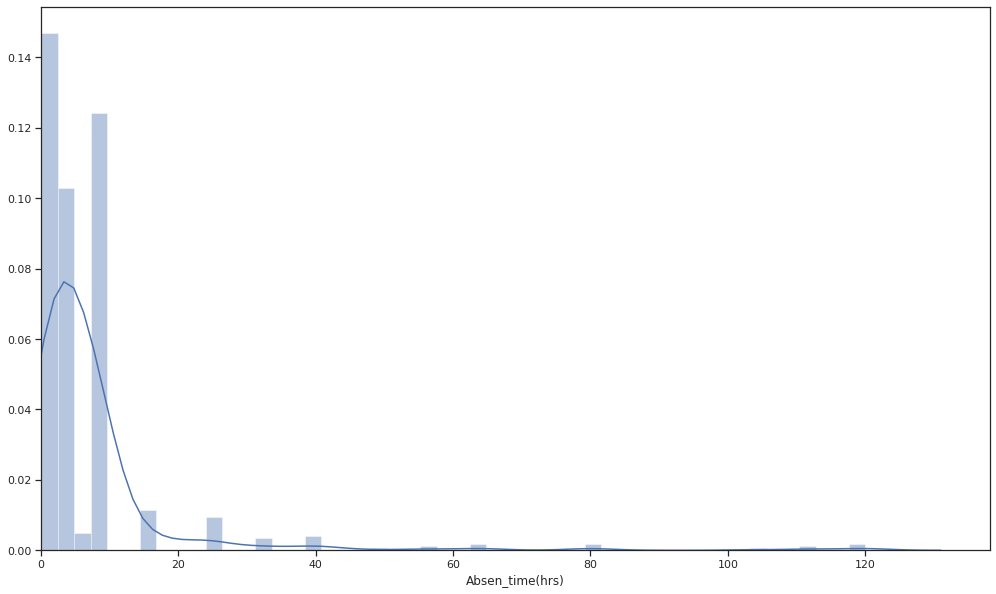

In [28]:
fig, ax = plt.subplots(figsize=(17,10))
sns.distplot(df['Absen_time(hrs)'])
ax.set_xlim(xmin=0)

### Heatmap of Correlations between Characteristics

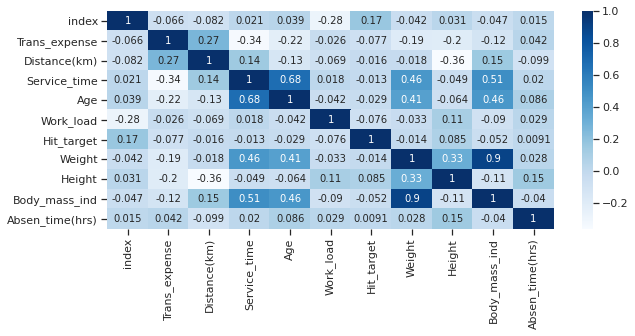

In [29]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

It can be said that there are positive correlations between 'BMI and Weight', 'Age and Service Time', 'BMI and Service Time', 'BMI and Age', 'Weight and Service Time' and 'Weight and Age'. There are negative correlation between 'Height and Distance' and, 'Service Time and Transportation Expense'. However I am searching for if there is any correlation between these characteristics and absent times. Since all numbers are close to 0, I might assume that there is no significant correlation.